# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv('D:\IronHack\Study\Bootcamp\labs\week13\lab-pivot-table-correlation\your_code\data\Employee.csv')

In [3]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
mean_salary  = employee.groupby('Department')['Salary'].mean()
print(mean_salary)

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [5]:
# Method 2
# your answer here
mean_salary_pivot = employee.pivot_table(values='Salary', index='Department', aggfunc='mean')
print(mean_salary_pivot)

            Salary
Department        
HR           45.00
IT           48.75
Sales        55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [6]:
# your answer here
mean_salary_pivot = employee.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc='mean')
print(mean_salary_pivot)


                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
# your answer here
pivot_table = employee.pivot_table(values=['Years', 'Salary'], index='Title', aggfunc='mean')

print(pivot_table)

              Salary  Years
Title                      
VP         70.000000   8.00
analyst    32.500000   2.25
associate  56.666667   4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [8]:
# your answer here
pivot_table = employee.pivot_table(
    values='Salary',
    index=['Department', 'Title'],
    aggfunc={'Salary': ['mean', 'count']}
)

pivot_table.columns = ['Number of Employees', 'Mean Salary']

print(pivot_table)

                      Number of Employees  Mean Salary
Department Title                                      
HR         VP                           1         70.0
           analyst                      2         32.5
IT         VP                           1         70.0
           analyst                      2         32.5
           associate                    1         60.0
Sales      associate                    2         55.0


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [9]:
# your answer here
pivot_table = employee.pivot_table(
    values='Salary',
    index=['Department', 'Title'],
    aggfunc={
        'Salary': ['median', 'min', 'max', 'std']
    }
)

pivot_table.columns = ['Max Salary','Median Salary', 'Min Salary', 'Salary Std Dev']

print(pivot_table)



                      Max Salary  Median Salary  Min Salary  Salary Std Dev
Department Title                                                           
HR         VP                 70           70.0          70             NaN
           analyst            35           32.5          30        3.535534
IT         VP                 70           70.0          70             NaN
           analyst            35           32.5          30        3.535534
           associate          60           60.0          60             NaN
Sales      associate          55           55.0          55        0.000000


#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your answer here
pivot_table['Salary Std Dev'] = pivot_table['Salary Std Dev'].fillna(0)

print(pivot_table)

                      Max Salary  Median Salary  Min Salary  Salary Std Dev
Department Title                                                           
HR         VP                 70           70.0          70        0.000000
           analyst            35           32.5          30        3.535534
IT         VP                 70           70.0          70        0.000000
           analyst            35           32.5          30        3.535534
           associate          60           60.0          60        0.000000
Sales      associate          55           55.0          55        0.000000


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
# your answer here
pivot_table = employee.pivot_table(
    values='Salary',
    index= 'Department',
    aggfunc={
        'Salary': ['count', 'sum']
    }
)

print(pivot_table)

            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110


In [12]:
employee_count = employee.groupby('Department')['Title'].count()
total_salary = employee.groupby('Department')['Salary'].sum()
department_summary = pd.DataFrame({
    'Number of Employees': employee_count,
    'Total Salary Expenditure': total_salary
})

print(department_summary)

            Number of Employees  Total Salary Expenditure
Department                                               
HR                            3                       135
IT                            4                       195
Sales                         2                       110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [13]:
pivot_table = employee.pivot_table(
    values=['Years', 'Salary'],
    index=['Department', 'Title'],
    aggfunc={'Years': 'sum', 'Salary': 'mean'}
)

pivot_table.columns = ['Mean Salary', 'Total Years of Experience']

print(pivot_table)

                      Mean Salary  Total Years of Experience
Department Title                                            
HR         VP                70.0                          8
           analyst           32.5                          6
IT         VP                70.0                          8
           analyst           32.5                          3
           associate         60.0                          7
Sales      associate         55.0                          5


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [14]:
# your answer here
is_max = employee.groupby('Department')['Salary'].transform(max) == employee['Salary']


df_filtered = employee[~is_max]


C:\Users\Yuliya Lavrenyuk\AppData\Local\Temp\ipykernel_21912\955580721.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  is_max = employee.groupby('Department')['Salary'].transform(max) == employee['Salary']


In [15]:
pivot_table = df_filtered.pivot_table(
    values='Salary',
    index='Department',
    aggfunc='mean'
)

print(pivot_table)

               Salary
Department           
HR          32.500000
IT          41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [33]:
# your answer here

fitbit = pd.read_csv('D:\IronHack\Study\Bootcamp\labs\week13\lab-pivot-table-correlation\your_code\data\Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [34]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [35]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [36]:
# your answer here
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])

print(f"The correlation between 'Minutes Very Active' and 'Steps' is: {correlation}")

The correlation between 'Minutes Very Active' and 'Steps' is: 0.5714518481062606


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

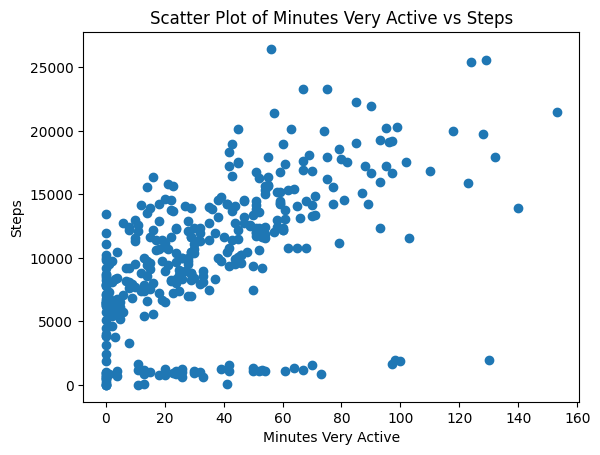

In [39]:
# your answer here
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Scatter Plot of Minutes Very Active vs Steps')
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [21]:
# your answer here
#There is a positive correlation between 2 columns, but also there there are outliers where number of steps stayed the same but active minutes are growing. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [40]:
# your answer here
correlation = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

print(f"The correlation between 'Minutes Sedentary' and 'Steps' is: {correlation}")

The correlation between 'Minutes Sedentary' and 'Steps' is: 0.07690608062990097


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

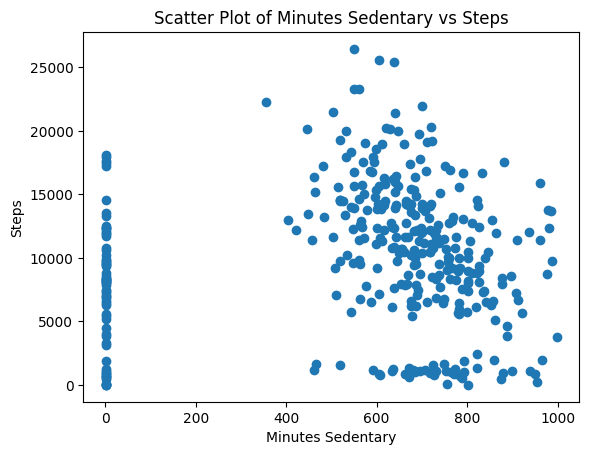

In [41]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Scatter Plot of Minutes Sedentary vs Steps')
plt.show()

#The correlation coeff is very low, and plot also doesnt show any linear correlation


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [42]:
# your answer here
correlation = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

print(f"The correlation between 'MinutesOfSleep' and 'Steps' is: {correlation}")

The correlation between 'MinutesOfSleep' and 'Steps' is: 0.13098565950836388


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

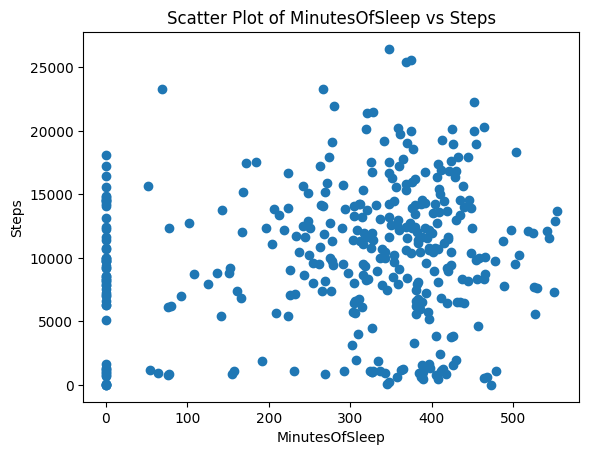

In [43]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.title('Scatter Plot of MinutesOfSleep vs Steps')
plt.show()


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [47]:
# your answer here
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset_df = fitbit[columns]
cor_fit = subset_df.corr()

display(cor_fit)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


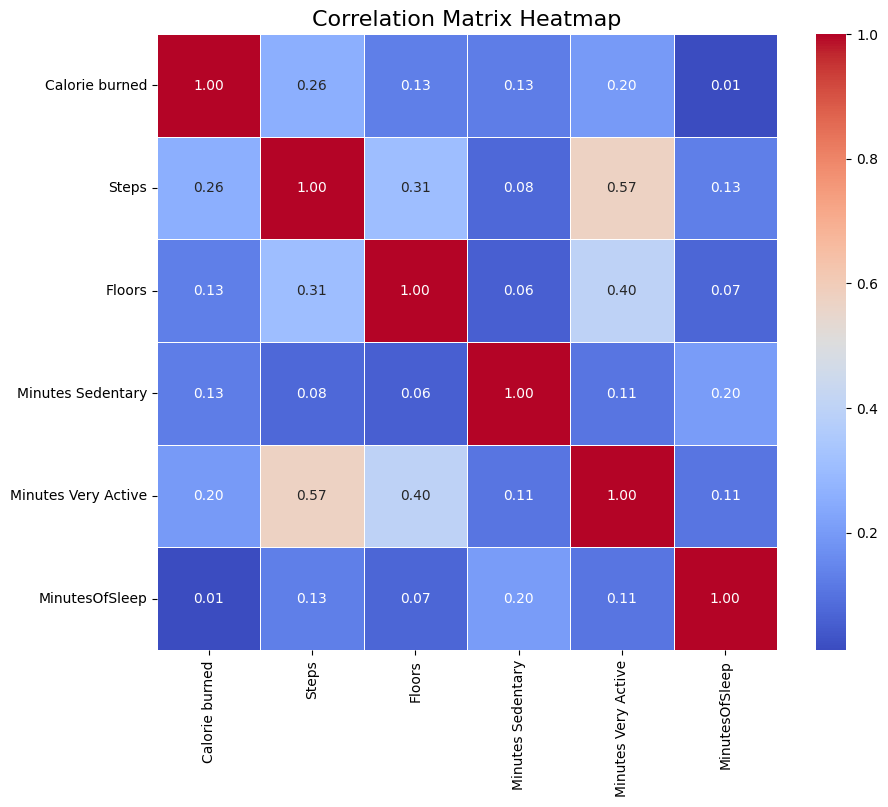

In [49]:
import seaborn as sns

plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(cor_fit, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap', size=16)

# Show the plot
plt.show()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here
# Steps vs Minutes very active
# Minutes very active vs Floors
# Floors vs Steps 
#Steps vs Calorie burned


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [51]:
# your answer here
time_grades = pd.read_csv('D:\IronHack\Study\Bootcamp\labs\week13\lab-pivot-table-correlation\your_code\data\Time_Grades.csv')

time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

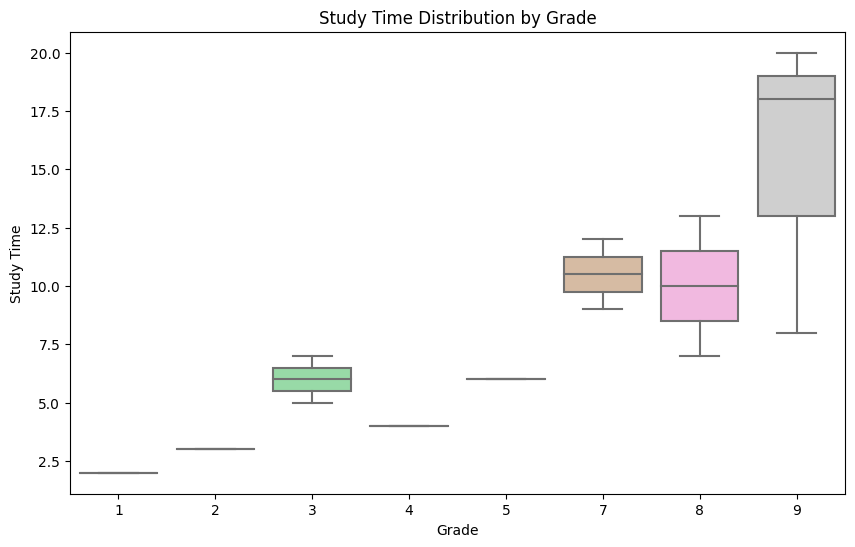

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Study time', data=time_grades, palette='pastel')

plt.xlabel('Grade')
plt.ylabel('Study Time')
plt.title('Study Time Distribution by Grade')

plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [64]:
# your answer here

import scipy.stats as stats

In [65]:
pearson_corr, pearson_p_value = stats.pearsonr(time_grades['Study time'], time_grades['Grade'])

spearman_corr, spearman_p_value = stats.spearmanr(time_grades['Study time'], time_grades['Grade'])

print(f"Pearson correlation: {pearson_corr:.2f} (p-value: {pearson_p_value:.2e})")
print(f"Spearman correlation: {spearman_corr:.2f} (p-value: {spearman_p_value:.2e})")

Pearson correlation: 0.80 (p-value: 3.63e-04)
Spearman correlation: 0.82 (p-value: 1.84e-04)


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

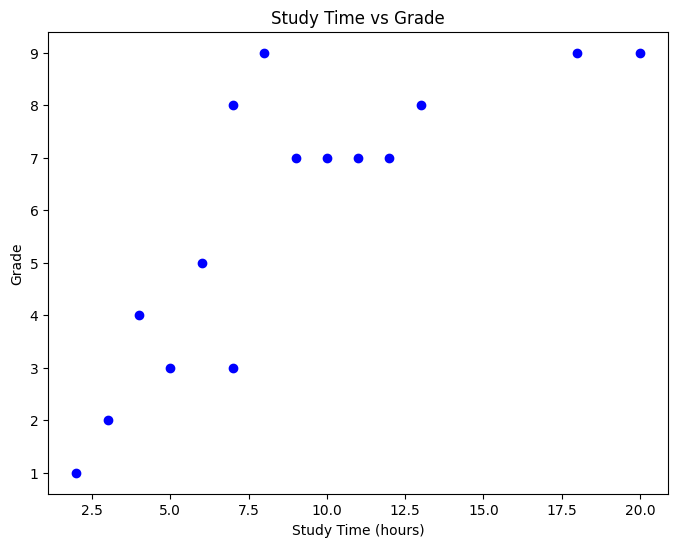

In [66]:
# your answer here
plt.figure(figsize=(8, 6))


plt.scatter(time_grades['Study time'], time_grades['Grade'], color='blue')
plt.xlabel('Study Time (hours)')
plt.ylabel('Grade')
plt.title('Study Time vs Grade')


plt.show()

In [ ]:
# The plot indicates a general upward trend, suggesting that as Study Time increases, Grade also increases. 
# This supports the idea that more study time tends to be associated with higher grades.
# There's some clustering of grades between 7 and 9 for a wide range of study times (around 7 to 20 hours). This might suggest that beyond a certain point, increasing study time does not significantly differentiate grades.
# There are points where increased study time does not correspond to higher grades (e.g., one instance where a study time of about 9 hours results in a lower grade compared to other points with the same study time). This could indicate other factors influencing grades beyond just study time.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [32]:
# # your answer here
# Pearson Correlation indicates a linear relationship between Study Time and Grade. However, in the scatter plot, while there’s a positive trend, it doesn’t appear perfectly linear, especially in the middle range of study times.
# Spearman Correlation suggests a strong monotonic relationship, meaning that as Study Time increases, Grade increases in a consistent manner, although not necessarily at the same rate throughout.